In [175]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import math

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve

# 1. Importing  Data

#  2. Data Exploratory Analysis

# Creating X and Y for the dataset

In [176]:
X_select = pd.read_csv('NY/X_select.csv',index_col=0)
Y = pd.read_csv('NY/Y.csv',index_col=0)


# Data visulization

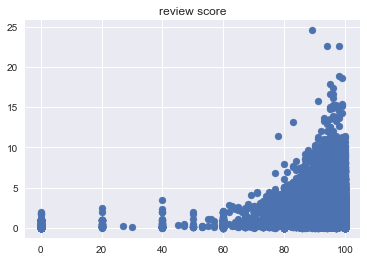

In [177]:
plt.scatter(X_select.review_scores_rating,Y)
plt.title("review score")

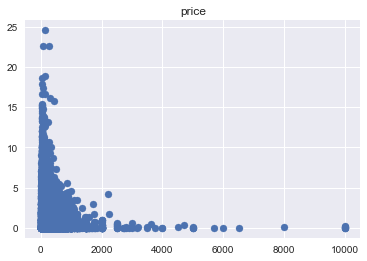

In [178]:
plt.scatter(X_select.price,Y)
plt.title("price")

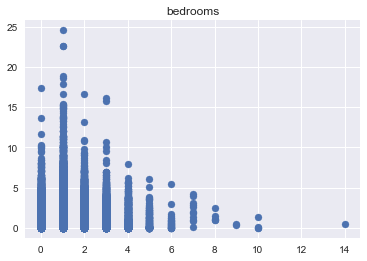

In [179]:
plt.scatter(X_select.bedrooms,Y)
plt.title("bedrooms")

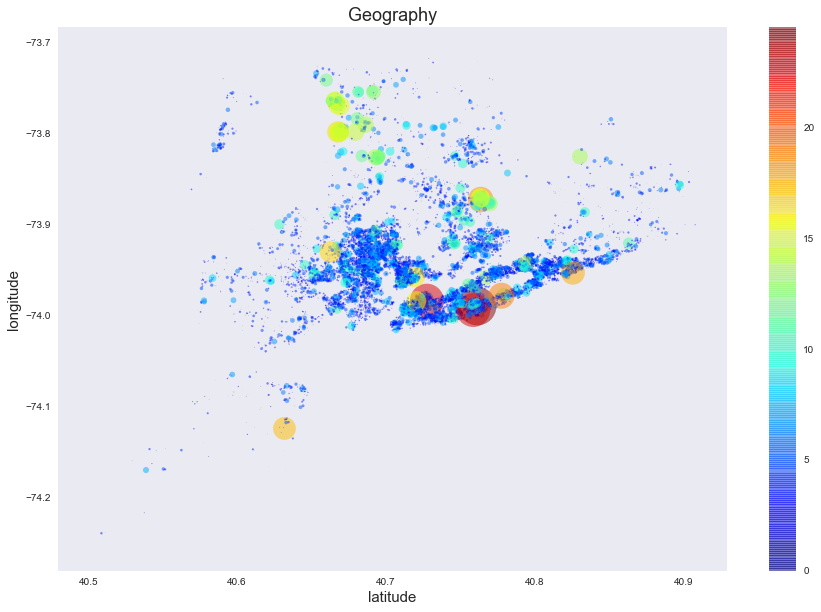

In [180]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,1,1)
cm = plt.cm.get_cmap('jet')
sc = ax.scatter(X_select['latitude'],X_select['longitude'], s=Y**3/10,c=Y,cmap=cm,linewidth=0,alpha=0.5)
ax.grid()
fig.colorbar(sc)
plt.xlabel('latitude',fontsize=15)
plt.ylabel('longitude',fontsize=15)
plt.title("Geography",fontsize=18)
plt.show()

# Splitting data into training and testing sets

In [181]:
num_test = 0.1
X_train, X_test, y_train, y_test = train_test_split(X_select, Y, test_size=num_test, random_state=23)

# Learning Curve

In [165]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

#     plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                      train_scores_mean + train_scores_std, alpha=0.1,
#                      color="r")
#     plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                      test_scores_mean + test_scores_std, alpha=0.1, color="g")
#     plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
#              label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Ridge Regression with Validation Curve

0.42809411666
0.418005878256


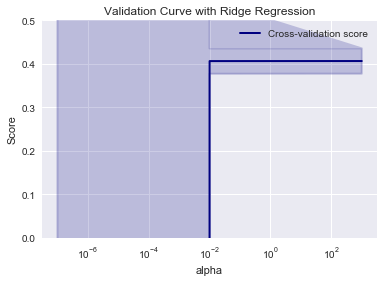

In [163]:
clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train) 
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)
print(clf.score(X_test, y_test))
print(clf.score(X_train, y_train))


param_range = np.logspace(-7, 3, 3)
# train_scores, test_scores = validation_curve(
#     Ridge(), X_select, Y, param_name="alpha", param_range=param_range,
#     cv=10, scoring="accuracy", n_jobs=1)
train_scores, test_scores = validation_curve(Ridge(), X_select, Y, "alpha",param_range,cv=10, n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Ridge Regression")
plt.xlabel("alpha")
plt.ylabel("Score")
plt.ylim(0.0, 0.5)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [42]:
np.mean(y_train)

reviews_per_month    1.141253
dtype: float64

In [54]:
from sklearn.metrics import mean_squared_error
mean_squared_error(clf.predict(X_train),y_train)**0.5

1.2959962082376224

In [55]:

mean_squared_error(clf.predict(X_test),y_test)**0.5

1.23551085671134

In [38]:
clf.predict(X_train)

array([[ 2.52576123],
       [ 1.14953533],
       [ 1.68666285],
       ..., 
       [ 1.50326498],
       [ 0.46337435],
       [ 1.70889112]])

# Linear Regression

In [173]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train) 
print(regr.score(X_test, y_test))
print(regr.score(X_train, y_train))
regr.get_params()
regr.coef_

# title = "Learning Curves (Linear Regression)"
# # SVC is more expensive so we do a lower number of CV iterations:
# cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
# estimator = regr
# plot_learning_curve(estimator, title, X_select, Y, cv=cv, n_jobs=4,train_sizes=np.linspace(.4, 1.0, 5))

0.428053208685
0.418034908173


array([[  6.59971540e-02,  -4.44157997e-02,  -1.07634723e-01,
          1.98038028e-02,   4.70284646e-02,   4.90323418e-01,
         -2.23411310e-01,  -7.52452555e-05,   6.73047510e-04,
          3.73958565e-02,  -9.51864490e-02,   1.36410037e-01,
          1.12792389e-01,  -4.80456220e-01,  -3.15467487e-01,
          2.68525225e-01,   1.69305011e-01,   1.71412979e-01,
         -1.34632257e-02,   3.68728853e-01,  -1.45352582e-01,
         -1.03904676e-01,  -6.46481699e-03,   4.58015601e-02,
         -2.59471560e-02,  -1.58834727e-03,   8.47817984e-02,
         -2.99726488e-02,  -1.91827292e-01,  -1.16582605e-01,
         -1.88893808e-01,  -1.93458255e-01,  -8.55365733e-02,
         -2.92215516e-01,  -1.26337548e-01,  -3.34443469e-01,
          1.87913010e-01,  -4.00636046e-02,   4.64738528e-02,
         -1.53400477e-02,  -2.19288713e-03,   5.20354578e-02,
         -4.57824829e-02,   7.10100473e-02,   6.04085359e-02,
         -5.52390301e-02,   9.00961151e-02,   3.88785368e-02,
        

# Lasso

In [20]:
clf = linear_model.Lasso(alpha=0.0, fit_intercept=True, 
                         normalize=True, precompute=False, copy_X=True, 
                         positive=False, random_state=None,tol=0.001)
clf.fit(X_train, y_train) 
print(clf.score(X_test, y_test))

# param_range = np.logspace(-7, 3, 3)
# # train_scores, test_scores = validation_curve(
# #     Ridge(), X_select, Y, param_name="alpha", param_range=param_range,
# #     cv=10, scoring="accuracy", n_jobs=1)
# train_scores, test_scores = validation_curve(Lasso(), X_select, Y, "alpha",param_range,cv=10, n_jobs=1)
# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)

# plt.title("Validation Curve with Lasso Regression")
# plt.xlabel("alpha")
# plt.ylabel("Score")
# plt.ylim(0.0, 0.5)
# lw = 2
# plt.semilogx(param_range, train_scores_mean, label="Training score",
#              color="darkorange", lw=lw)
# plt.fill_between(param_range, train_scores_mean - train_scores_std,
#                  train_scores_mean + train_scores_std, alpha=0.2,
#                  color="darkorange", lw=lw)
# plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
#              color="navy", lw=lw)
# plt.fill_between(param_range, test_scores_mean - test_scores_std,
#                  test_scores_mean + test_scores_std, alpha=0.2,
#                  color="navy", lw=lw)
# plt.legend(loc="best")
# plt.show()

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  after removing the cwd from sys.path.
/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


0.427783265041


/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


# Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression

regr = ElasticNet(random_state=0)
regr.fit(X_train, y_train)
ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=0, selection='cyclic', tol=0.0001, warm_start=False)
# print(regr.coef_) 
# print(regr.intercept_) 
# print(regr.predict([[0, 0]])) 
regr.score(X_test, y_test)

# SVR

In [ ]:
from sklearn import svm
clf_svm=svm.SVR(kernel='linear')
clf_svm.fit(X_train,y_train)
clf_svm.score(X_test,y_test)

In [48]:
price

accommodates  bathrooms  bedrooms  beds  guests_included   latitude  \
223               4        1.0       2.0   2.0                1  40.772405   
4354              5        1.0       1.0   3.0                2  40.694041   
641               2        1.0       1.0   1.0                1  40.761318   
12134             2        1.0       1.0   1.0                1  40.676824   
34673             1        1.0       1.0   1.0                1  40.743519   
39514             3        1.0       2.0   1.0                1  40.732395   
34451             2        1.0       1.0   1.0                1  40.710638   
10677             2        1.0       1.0   1.0                1  40.691866   
30910             5        1.0       3.0   3.0                1  40.665872   
36396             4        1.0       1.0   2.0                1  40.764360   

       longitude  price  avail  1          ...           178  179  180  181  \
223   -73.904740    180     18  1          ...             0    0  0.0  0.0   
4354  -73.951074     85    328  0          ...             0    0  0.0  0.0   
641   -73.923759     59      0  0          ...             0    0  0.0  0.0   
12134 -73.952668    115     73  0          ...             0    0  0.0  0.0   
34673 -73.905640     35     82  0          ...             0    0  0.0  0.0   
39514 -74.002816    300      0  0          ...             0    0  0.0  0.0   
34451 -73.993174     99    157  0          ...             0    0  0.0  0.0   
10677 -73.969277     75    129  0          ...             0    0  0.0  0.0   
30910 -73.977365    250      0  0          ...             0    0  0.0  0.0   
36396 -73.964712    300     31  0          ...             0    0  0.0  0.0   

         182  183  184  185  186  review_scores_rating  
223      223    1    0    0    0                 100.0  
4354    4354    0    1    0    0                  91.0  
641      641    0    1    0    0                   0.0  
12134  12134    0    1    0    0                  90.0  
34673  34675    0    0    1    0                  94.0  
39514  39517    1    0    0    0                 100.0  
34451  34453    0    1    0    0                  96.0  
10677  10677    0    1    0  200                  97.0  
30910  30912    1    0    0    0                   0.0  
36396  36399    1    0    0    0                  93.0  

[10 rows x 196 columns]

In [64]:
y_test

reviews_per_month
0                       
223                 4.00
4354                3.99
641                 0.00
12134               0.43
34673               3.45
39514               0.04
34451               7.06
10677               3.38
30910               0.00
36396               0.30
38017               0.00
39348               0.17
29725               0.57
40200               0.00
27142               2.27
1389                0.00
13219               0.00
28711               0.00
2571                1.08
4364                0.64
14713               1.88
8099                1.63
20758               0.33
13264               0.00
32710               0.00
35098               0.15
24926               3.93
27554               0.08
26380               0.00
18568               1.37
...                  ...
18775               0.00
37635               1.32
5333                1.80
42581               0.75
12468               1.41
14300               0.00
34323               0.00
39386               3.88
11653               3.58
17998               2.02
20148               0.00
42093               0.07
6000                0.00
34874               3.10
19336               0.68
42839               0.12
32914               0.66
31557               0.00
27041               0.47
42255               0.03
24672               1.18
40543               0.46
24114               0.00
37199               0.66
3881                0.00
2241                0.00
35246               0.68
22426               0.29
24529               2.00
6372                1.00

[4383 rows x 1 columns]

# Random Forest

In [189]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
# RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
#            max_features='auto', max_leaf_nodes=None,
#            min_impurity_decrease=0.0, min_impurity_split=None,
#            min_samples_leaf=1, min_samples_split=2,
#            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
#            oob_score=False, random_state=0, verbose=0, warm_start=False)
clf = RandomForestRegressor(max_depth=30, n_estimators=300, random_state=0)
clf.fit(X_train, y_train)
# print(clf.feature_importances_)
RFTrain = clf.predict(X_train)
RFTest = clf.predict(X_test)
clf.score(X_test, y_test)

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


0.61022233950841953

In [190]:
from sklearn.metrics import mean_squared_error
y_pred = clf.predict(X_test)
mean_squared_error(y_test, y_pred)

0.97842147014443159

Feature ranking:
1. 131 (0.201376)
2. review_scores_rating (0.162206)
3. avail (0.065425)
4. longitude (0.049987)
5. 127 (0.045552)
6. latitude (0.036992)
7. 123 (0.035458)
8. price (0.030788)
9. 150 (0.022942)
10. 186 (0.014433)
11. accommodates (0.013227)
12. 53 (0.009252)
13. 125 (0.008825)
14. 117 (0.007607)
15. 110 (0.007461)
16. 126 (0.007444)
17. 182 (0.007361)
18. 151 (0.007301)
19. 132 (0.007283)
20. guests_included (0.007105)


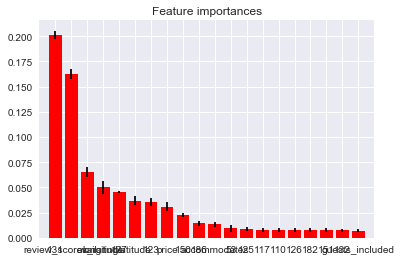

In [114]:
importances1 = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices1 = np.argsort(importances1)[::-1][:20]

# Print the feature ranking
print("Feature ranking:")

for f in range(20):
    print("%d. %s (%f)" % (f + 1, X_train.columns.values[indices1[f]], importances1[indices1[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(20), importances1[indices1],
       color="r", yerr=std[indices1], align="center")
plt.xticks(range(20), X_train.columns.values[indices1])
plt.xlim([-1, 20])
plt.show()


In [137]:
# result = [[0,0,0,0,0,0] for _ in xrange(10)]
# for i in xrange(10):
#     a = 0.5*X_test.iloc[i].price
#     b = 2*X_test.iloc[i].price
#     result[i][0] = y_test.iloc[i].reviews_per_month*a*2    
#     result[i][2] = X_test.iloc[i].price 
#     result[i][4] = y_test.iloc[i].reviews_per_month
#     maxs = 0
#     p = 0
#     rev = 0
#     for prices in xrange(int(a),int(b)):
#         temp = X_test.iloc[i]
#         temp.price = prices
#         prof = clf.predict(temp)
#         if prices*prof>maxs:
#             maxs = prices*prof
#             p = prices
#             rev = prof
#     result[i][1] = maxs
#     result[i][3] = p
#     result[i][5] = rev
for i in xrange(10):
    
    result[i][2] = X_test.iloc[i].price 
    result[i][4] = y_test.iloc[i].reviews_per_month

result

[[720.0, array([ 981.84106667]), 180.0, 359, 4.0, array([ 2.73493333])],
 [339.15000000000003,
  array([ 588.19136897]),
  85.0,
  169,
  3.9900000000000002,
  array([ 3.4804223])],
 [0.0, array([ 0.24653596]), 59.0, 58, 0.0, array([ 0.00425062])],
 [49.449999999999996,
  array([ 398.48169555]),
  115.0,
  229,
  0.42999999999999999,
  array([ 1.74009474])],
 [120.75,
  array([ 187.21105556]),
  35.0,
  69,
  3.4500000000000002,
  array([ 2.7132037])],
 [12.0,
  array([ 53.98365703]),
  300.0,
  599,
  0.040000000000000001,
  array([ 0.09012297])],
 [698.93999999999994,
  array([ 1094.56483333]),
  99.0,
  197,
  7.0599999999999996,
  array([ 5.55616667])],
 [253.5,
  array([ 520.16709087]),
  75.0,
  149,
  3.3799999999999999,
  array([ 3.4910543])],
 [0.0, array([ 2.33779412]), 250.0, 189, 0.0, array([ 0.01236928])],
 [90.0,
  array([ 556.07765372]),
  300.0,
  599,
  0.29999999999999999,
  array([ 0.92834333])]]

# XGboost

In [127]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
# X_trains = preprocessing.scale(X_train)
# X_trains = pd.DataFrame(X_trains)
# You can experiment with many other options here, using the same .fit() and .predict()
# methods; see http://scikit-learn.org
# This example uses the current build of XGBoost, from https://github.com/dmlc/xgboost
gbm = xgb.XGBRegressor(max_depth=5, n_estimators=400, learning_rate=0.05).fit(X_train, y_train)
# X_tests = preprocessing.scale(X_test)
# X_tests = pd.DataFrame(X_tests)
predictions = gbm.predict(X_test)
XGTrains = gbm.predict(X_train)
XGTests = gbm.predict(X_test)
gbm.score(X_test, y_test)


0.60831205360537322

In [186]:
from sklearn.metrics import mean_squared_error
y_pred = gbm.predict(X_test)
mean_squared_error(y_test, y_pred)

0.98354910223204062

In [113]:
importances2 = gbm.feature_importances_
# std = np.std([tree.feature_importances_ for tree in gbm.estimators_],
#              axis=0)
indices2 = np.argsort(importances2)[::-1][:20]

# Print the feature ranking
print("Feature ranking:")

for f in range(20):
    print("%d. %s (%f)" % (f + 1, X_train.columns.values[indices2[f]], importances2[indices2[f]]))

# Plot the feature importances of the forest
# plt.figure()
# plt.title("Feature importances")
# plt.bar(range(20), importances[indices],
#        color="r", yerr=std[indices], align="center")
# plt.xticks(range(20), X_train.columns.values[indices])
# plt.xlim([-1, 20])
# plt.show()


Feature ranking:
1. review_scores_rating (0.114301)
2. longitude (0.084236)
3. avail (0.078277)
4. latitude (0.067353)
5. 123 (0.043247)
6. 110 (0.043156)
7. price (0.042886)
8. accommodates (0.042524)
9. 131 (0.026544)
10. 186 (0.018238)
11. 150 (0.016703)
12. 125 (0.013994)
13. beds (0.013904)
14. bedrooms (0.013814)
15. guests_included (0.013182)
16. 127 (0.011647)
17. bathrooms (0.010834)
18. 87 (0.008758)
19. 63 (0.008758)
20. 124 (0.008577)


In [183]:
result = [[0,0,0,0,0,0] for _ in xrange(10)]
for i in xrange(10):
    a = 0.5*X_test.iloc[i].price
    b = 2*X_test.iloc[i].price
    result[i][0] = y_test.iloc[i].reviews_per_month*a*2    
    result[i][2] = X_test.iloc[i].price 
    result[i][4] = y_test.iloc[i].reviews_per_month
    maxs = 0
    p = 0
    rev = 0
    for prices in xrange(int(a),int(b)):
        temp = X_test.iloc[i:i+1]
        temp.price = prices
        prof = gbm.predict(temp)
#         print(temp)
        if prices*prof>maxs:
            maxs = prices*prof
            p = prices
            rev = prof
    result[i][1] = maxs
    result[i][3] = p
    result[i][5] = rev


In [184]:

result

[[619.20000000000005,
  array([ 451.05596924], dtype=float32),
  180.0,
  299,
  3.4399999999999999,
  array([ 1.50854838], dtype=float32)],
 [339.15000000000003,
  array([ 551.61364746], dtype=float32),
  85.0,
  169,
  3.9900000000000002,
  array([ 3.26398611], dtype=float32)],
 [0.0,
  array([ 4.27866745], dtype=float32),
  59.0,
  62,
  0.0,
  array([ 0.06901076], dtype=float32)],
 [49.449999999999996,
  array([ 447.63977051], dtype=float32),
  115.0,
  229,
  0.42999999999999999,
  array([ 1.95475876], dtype=float32)],
 [120.75,
  array([ 143.33123779], dtype=float32),
  35.0,
  69,
  3.4500000000000002,
  array([ 2.07726431], dtype=float32)],
 [12.0,
  array([ 21.15470695], dtype=float32),
  300.0,
  599,
  0.040000000000000001,
  array([ 0.03531671], dtype=float32)],
 [698.93999999999994,
  array([ 705.9677124], dtype=float32),
  99.0,
  197,
  7.0599999999999996,
  array([ 3.58359241], dtype=float32)],
 [253.5,
  array([ 467.79812622], dtype=float32),
  75.0,
  147,
  3.3799999

# Deep Net

In [19]:
from __future__ import print_function
from keras.models import Sequential
from keras.optimizers import SGD, RMSprop, Adam
from keras.layers import Dense, Activation, Dropout

# create model
tmodel = Sequential()
tmodel.add(Dense(input_dim=X_train.shape[1], units=128,
                 kernel_initializer='normal', bias_initializer='zeros'))
tmodel.add(Activation('relu'))

for i in range(0, 8):
    tmodel.add(Dense(units=100, kernel_initializer='normal',
                     bias_initializer='zeros'))
    tmodel.add(Activation('relu'))
    tmodel.add(Dropout(.25))

tmodel.add(Dense(units=1))
tmodel.add(Activation('linear'))

tmodel.compile(loss='mean_squared_error', optimizer='rmsprop')

tmodel.fit(X_train.values, y_train.values, epochs=100, verbose=0)

DNTrain = tmodel.predict(X_train.values)
DNTest = tmodel.predict(X_test.values)

ImportError: No module named keras.models

In [ ]:
classes = tmodel.predict(X_test.values)
loss_and_metrics = tmodel.evaluate(X_test.values, y_test.values, batch_size=128)
print(loss_and_metrics)
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test.values, classes))
r2_score(y_test, classes)

# Adaboost

In [129]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
rng = np.random.RandomState(1)
regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=12),
                          n_estimators=150, learning_rate=0.9, random_state=rng)

regr_2.fit(X_train, y_train)
regr_2.score(X_test, y_test)

0.57785271454234044

In [185]:
from sklearn.metrics import mean_squared_error
y_pred = regr_2.predict(X_test)
mean_squared_error(y_test, y_pred)

1.0604070863447437

Feature ranking:
1. longitude (0.100081)
2. avail (0.085898)
3. latitude (0.082358)
4. review_scores_rating (0.063882)
5. 123 (0.053459)
6. price (0.047315)
7. 131 (0.034356)
8. 150 (0.017981)
9. accommodates (0.017822)
10. 125 (0.016220)
11. 186 (0.014747)
12. guests_included (0.014469)
13. 71 (0.011817)
14. 126 (0.011600)
15. 117 (0.010286)
16. 132 (0.010129)
17. 182 (0.010057)
18. 110 (0.009887)
19. 35 (0.009717)
20. 15 (0.009422)


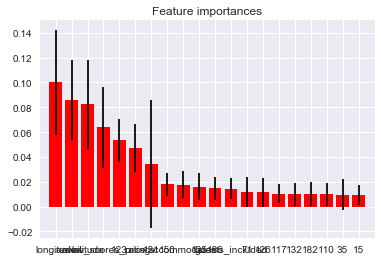

In [116]:
importances3 = regr_2.feature_importances_
std = np.std([tree.feature_importances_ for tree in regr_2.estimators_],
             axis=0)
indices3 = np.argsort(importances3)[::-1][:20]

# Print the feature ranking
print("Feature ranking:")

for f in range(20):
    print("%d. %s (%f)" % (f + 1, X_train.columns.values[indices3[f]], importances3[indices3[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(20), importances3[indices3],
       color="r", yerr=std[indices3], align="center")
plt.xticks(range(20), X_train.columns.values[indices3])
plt.xlim([-1, 20])
plt.show()


# Average feature importance

In [119]:
features = []
for i in xrange(len(importances1)):
    features+= (importances1[i]+importances2[i]+importances3[i])/3,
indices4 = np.argsort(features)[::-1][:20]

In [120]:
for f in range(20):
    print("%d. %s (%f)" % (f + 1, X_train.columns.values[indices4[f]], features[indices4[f]]))

1. review_scores_rating (0.113463)
2. 131 (0.087425)
3. longitude (0.078101)
4. avail (0.076533)
5. latitude (0.062235)
6. 123 (0.044055)
7. price (0.040330)
8. accommodates (0.024524)
9. 110 (0.020168)
10. 127 (0.019660)
11. 150 (0.019209)
12. 186 (0.015806)
13. 125 (0.013013)
14. guests_included (0.011585)
15. beds (0.009470)
16. bedrooms (0.008785)
17. 63 (0.007508)
18. bathrooms (0.007362)
19. 124 (0.007050)
20. 53 (0.006976)


# result = [oldprofit,optprofit,oldprice,optprice,oldreview,optreview]

In [136]:
# result3 = [[0,0,0,0,0,0] for _ in xrange(10)]
# for i in xrange(10):
#     a = 0.5*X_test.iloc[i].price
#     b = 2*X_test.iloc[i].price
#     result3[i][0] = y_test.iloc[i].reviews_per_month*a*2    
#     result3[i][2] = X_test.iloc[i].price 
#     result3[i][4] = y_test.iloc[i].reviews_per_month
#     maxs = 0
#     p = 0
#     rev = 0
#     for prices in xrange(int(a),int(b)):
#         temp = X_test.iloc[i]
#         temp.price = prices
#         prof = regr_2.predict(temp)
#         if prices*prof>maxs:
#             maxs = prices*prof
#             p = prices
#             rev = prof
#     result3[i][1] = maxs
#     result3[i][3] = p
#     result3[i][5] = rev
# result3
for i in xrange(10):
    
    result3[i][2] = X_test.iloc[i].price 
    result3[i][4] = y_test.iloc[i].reviews_per_month

result3

[[720.0, array([ 767.69015873]), 180.0, 359, 4.0, array([ 2.1384127])],
 [339.15000000000003,
  array([ 477.58359238]),
  85.0,
  169,
  3.9900000000000002,
  array([ 2.82593842])],
 [0.0, array([ 21.53863636]), 59.0, 117, 0.0, array([ 0.18409091])],
 [49.449999999999996,
  array([ 385.55616297]),
  115.0,
  229,
  0.42999999999999999,
  array([ 1.68365137])],
 [120.75, array([ 149.36]), 35.0, 64, 3.4500000000000002, array([ 2.33375])],
 [12.0,
  array([ 313.41961905]),
  300.0,
  599,
  0.040000000000000001,
  array([ 0.5232381])],
 [698.93999999999994,
  array([ 1076.38211679]),
  99.0,
  197,
  7.0599999999999996,
  array([ 5.46386861])],
 [253.5,
  array([ 469.86819981]),
  75.0,
  149,
  3.3799999999999999,
  array([ 3.15347785])],
 [0.0, array([ 83.10269231]), 250.0, 499, 0.0, array([ 0.16653846])],
 [90.0,
  array([ 677.26933333]),
  300.0,
  599,
  0.29999999999999999,
  array([ 1.13066667])]]

In [131]:
from sklearn.metrics import mean_squared_error
y_pred = regr_2.predict(X_test)
mean_squared_error(y_test, y_pred)

[[720.0, array([ 767.69015873]), 4.0, 359, 0, array([ 2.1384127])],
 [339.15000000000003,
  array([ 477.58359238]),
  3.9900000000000002,
  169,
  0,
  array([ 2.82593842])],
 [0.0, array([ 21.53863636]), 0.0, 117, 0, array([ 0.18409091])],
 [49.449999999999996,
  array([ 385.55616297]),
  0.42999999999999999,
  229,
  0,
  array([ 1.68365137])],
 [120.75, array([ 149.36]), 3.4500000000000002, 64, 0, array([ 2.33375])],
 [12.0,
  array([ 313.41961905]),
  0.040000000000000001,
  599,
  0,
  array([ 0.5232381])],
 [698.93999999999994,
  array([ 1076.38211679]),
  7.0599999999999996,
  197,
  0,
  array([ 5.46386861])],
 [253.5,
  array([ 469.86819981]),
  3.3799999999999999,
  149,
  0,
  array([ 3.15347785])],
 [0.0, array([ 83.10269231]), 0.0, 499, 0, array([ 0.16653846])],
 [90.0,
  array([ 677.26933333]),
  0.29999999999999999,
  599,
  0,
  array([ 1.13066667])]]

4.4377420980621851

In [ ]:
# grid search
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
# parameters = {'kernel':('linear', 'rbf'), 'n_estimators':[50,100,200,400]}
# svc = svm.SVC()
# clf = GridSearchCV(svc, parameters)
# clf.fit(iris.data, iris.target)
# sorted(clf.cv_results_.keys())
# clf.get_params(deep=False)

# base_estimator=None, n_estimators=50, learning_rate=1.0, algorithm=’SAMME.R’, random_state=None)

params = {'base_estimator__max_depth': [4,8,12],
          'learning_rate': [0.5, 0.7, 0.9, 1.1],
          'n_estimators': [125, 150]}
gs = GridSearchCV(AdaBoostRegressor(base_estimator=DecisionTreeRegressor()), params)
gs.fit(X_train, y_train)
gs.score(X_test, y_test)
gs.get_params(deep=False)
# params = {'base_estimator__max_depth':[1,50],
#           'base_estimator':[DecisionTreeClassifier(max_features=2), 
#                             DecisionTreeClassifier(max_features=10)]}
# gs = GridSearchCV(AdaBoostClassifier(base_estimator=DecisionTreeClassifier()), params)

# base_estimators = [DecisionTreeClassifier(max_depth=d) for d in range(1, 11)]
# grid = GridSearchCV(AdaBoostClassifier(), dict(base_estimator=base_estimators))

# Stacking/Ensembling

In [50]:
from sklearn.cross_validation import KFold;
ntrain = X_train.shape[0]
ntest = X_test.shape[0]
SEED = 0 # for reproducibility
NFOLDS = 5 # set folds for out-of-fold prediction
kf = KFold(ntrain, n_folds= NFOLDS, random_state=SEED)
# X_train.reset_index(inplace=True)
# y_train.reset_index(inplace=True)
# X_test.reset_index(inplace=True)
# y_test.reset_index(inplace=True)
X_train =X_train.as_matrix()
y_train =y_train.as_matrix()
X_test =X_test.as_matrix()
y_test =y_test.as_matrix()

id                                 name   host_id host_name  \
0   241032         Stylish Queen Anne Apartment    956883       NaN   
1   953595   Bright & Airy Queen Anne Apartment   5177328    Andrea   
2  3308979  New Modern House-Amazing water view  16708587       NaN   
3  7421966                   Queen Anne Chateau   9851441       NaN   
4   278830       Charming craftsman 3 bdm house   1452570       NaN   

  neighbourhood_group    neighbourhood   latitude   longitude  \
0          Queen Anne  West Queen Anne  47.636289 -122.371025   
1          Queen Anne  West Queen Anne  47.639123 -122.365666   
2          Queen Anne  West Queen Anne  47.629724 -122.369483   
3          Queen Anne  West Queen Anne  47.638473 -122.369279   
4          Queen Anne  West Queen Anne  47.632918 -122.372471   

         room_type  price ...   Townhouse  Loft Boat  Bed & Breakfast  Other  \
0  Entire home/apt     85 ...           0     0    0                0      0   
1  Entire home/apt    150 ...           0     0    0                0      0   
2  Entire home/apt    975 ...           0     0    0                0      0   
3  Entire home/apt    100 ...           0     0    0                0      0   
4  Entire home/apt    450 ...           0     0    0                0      0   

   Dorm  Treehouse Yurt  Chalet Tent  
0     0          0    0       0    0  
1     0          0    0       0    0  
2     0          0    0       0    0  
3     0          0    0       0    0  
4     0          0    0       0    0  

[5 rows x 124 columns]

In [ ]:
def get_oof(clf, x_train, y_train, x_test):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))

    for i, (train_index, test_index) in enumerate(kf):
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]

        clf.fit(x_tr, y_tr)

        oof_train[test_index] = clf.predict(x_te).flatten()
        oof_test_skf[i, :] = clf.predict(x_test).flatten()
    xx = oof_test_skf.mean(axis=0)
    oof_test[:] = xx.flatten()
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

In [ ]:
rr = Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)
rr_oof_train, rr_oof_test = get_oof(rr, X_train, y_train, X_test) # Ridge Regression
ann = MLPRegressor(solver='adam', alpha=1e-4,hidden_layer_sizes=(1000, 6), random_state=1)
rf_oof_train, rf_oof_test = get_oof(ann,X_train, y_train, X_test) # ANN
ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=8),
                          n_estimators=100, random_state=rng)
ada_oof_train, ada_oof_test = get_oof(ada, X_train, y_train, X_test) # AdaBoost 

In [ ]:
x_train = np.concatenate(( rr_oof_train, rf_oof_train, ada_oof_train), axis=1)
x_test = np.concatenate(( rr_oof_test, rf_oof_test, ada_oof_test), axis=1)

import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
# x_train = preprocessing.scale(x_train)
x_test = pd.DataFrame(x_test)
x_train = pd.DataFrame(x_train)
# You can experiment with many other options here, using the same .fit() and .predict()
# methods; see http://scikit-learn.org
# This example uses the current build of XGBoost, from https://github.com/dmlc/xgboost
gbm = xgb.XGBRegressor(max_depth=3, n_estimators=400, learning_rate=0.05).fit(x_train, y_train)
# X_test = preprocessing.scale(X_test)
# X_test = pd.DataFrame(X_test)

predictions = gbm.predict(x_test)

In [ ]:
RFTrain = pd.DataFrame(RFTrain)
RFTest = pd.DataFrame(RFTest)
XGTrain = pd.DataFrame(XGTrain)
XGTest = pd.DataFrame(XGTest)
ANNTrain = pd.DataFrame(ridgeTrain)
ANNTest = pd.DataFrame(ridgeTest)
x_train = np.concatenate(( ridgeTrain, ANNTrain, RFTrain ,XGTrain), axis=1)
x_test = np.concatenate(( ridgeTest, ANNTest, RFTest, XGTest), axis=1)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
rng = np.random.RandomState(1)
regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=8),
                          n_estimators=100, random_state=rng)

regr_2.fit(x_train, y_train)
pred = regr_2.predict(x_test)
pred = pd.DataFrame(pred)
regr_2.score(x_test, y_test)
r2_score( y_test,pred)

In [51]:
# Extract the Y vector


In [52]:
print(nbhd.columns.values)
print(nbhd.shape)

['neighbourhood_group' 'neighbourhood']
(90, 2)


In [53]:
print(review1.columns.values)
print(review1.shape)

['listing_id' 'date']
(84849, 2)


In [54]:
print(review2.columns.values)
print(review2.shape)

['listing_id' 'id' 'date' 'reviewer_id' 'reviewer_name' 'comments']
(84849, 6)


In [55]:
print(calendar.columns.values)
print(calendar.shape)
calendar.head()

['listing_id' 'date' 'available' 'price']
(1393570, 4)


listing_id        date available   price
0      241032  2016-01-04         t  $85.00
1      241032  2016-01-05         t  $85.00
2      241032  2016-01-06         f     NaN
3      241032  2016-01-07         f     NaN
4      241032  2016-01-08         f     NaN

In [ ]:
newlist1= list1.drop(['host_name', 'last_review','host_id','calculated_host_listings_count'], axis=1)
newlist1.head()

In [ ]:
list2['averating'] = list2[["review_scores_checkin", "review_scores_accuracy","review_scores_communication", "review_scores_location","review_scores_value", "review_scores_cleanliness"]].mean(axis=1)
ax = sns.regplot(x="averating", y="review_scores_rating", data=list2)

In [ ]:
yy = pd.DataFrame()
yy['review_scores_rating'] = list2['review_scores_rating']
xx = pd.DataFrame()
xx['host_response_rate'] = list2['host_response_rate']
# print(math.isnan(xx['host_response_rate'][3]))
for i in xrange(xx.shape[0]):
    if isinstance(xx['host_response_rate'][i], basestring):
        xx['host_response_rate'][i] = 1.0*int(xx['host_response_rate'][i][:-1])
combine = pd.concat([xx,yy], axis=1)
combine = combine.dropna()

print(combine.tail)
ax = sns.regplot(x='host_response_rate', y="review_scores_rating", data=combine)# 